In [83]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

37.041628277075134 % Clase SI Cancelado
62.958371722924866 % Clase NO Cancelado


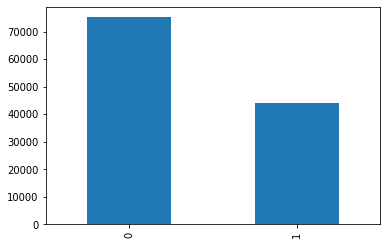

In [84]:
raw_data = pd.read_csv('hotel_bookings.csv')
raw_data.is_canceled.value_counts().plot(kind='bar')
print((44224/ (75166+44224)) * 100, "% Clase SI Cancelado")
print((75166/ (75166+44224)) * 100, "% Clase NO Cancelado")

In [85]:
raw_data.country.value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

<AxesSubplot:>

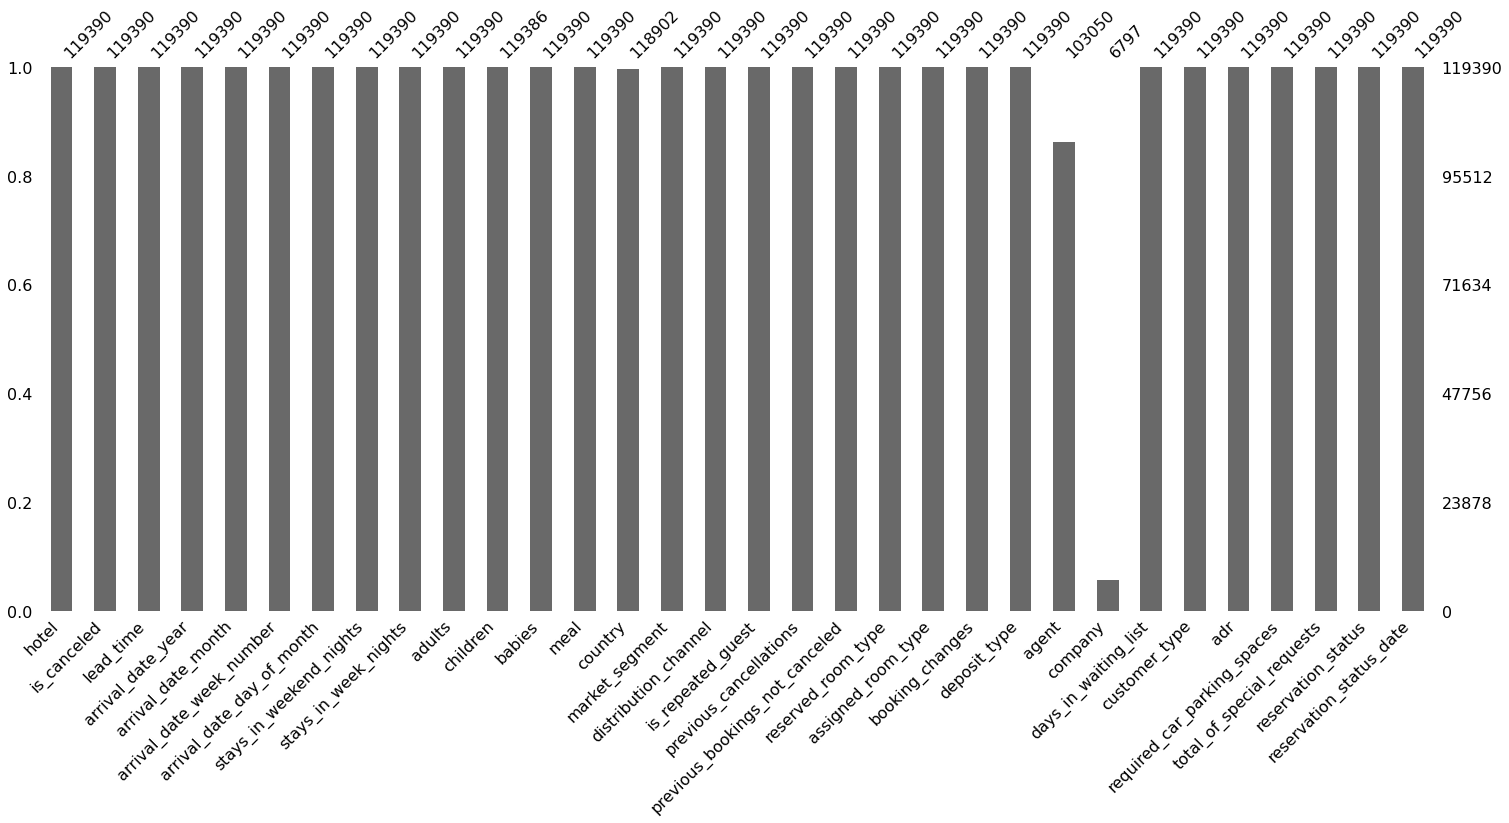

In [86]:
import missingno as msno
NaN = pd.DataFrame({'Null_instances' : raw_data.isnull().sum(), 'Null_instances_perc' : (raw_data.isnull().sum()/raw_data.shape[0]) * 100})
msno.bar(raw_data)

<AxesSubplot:>

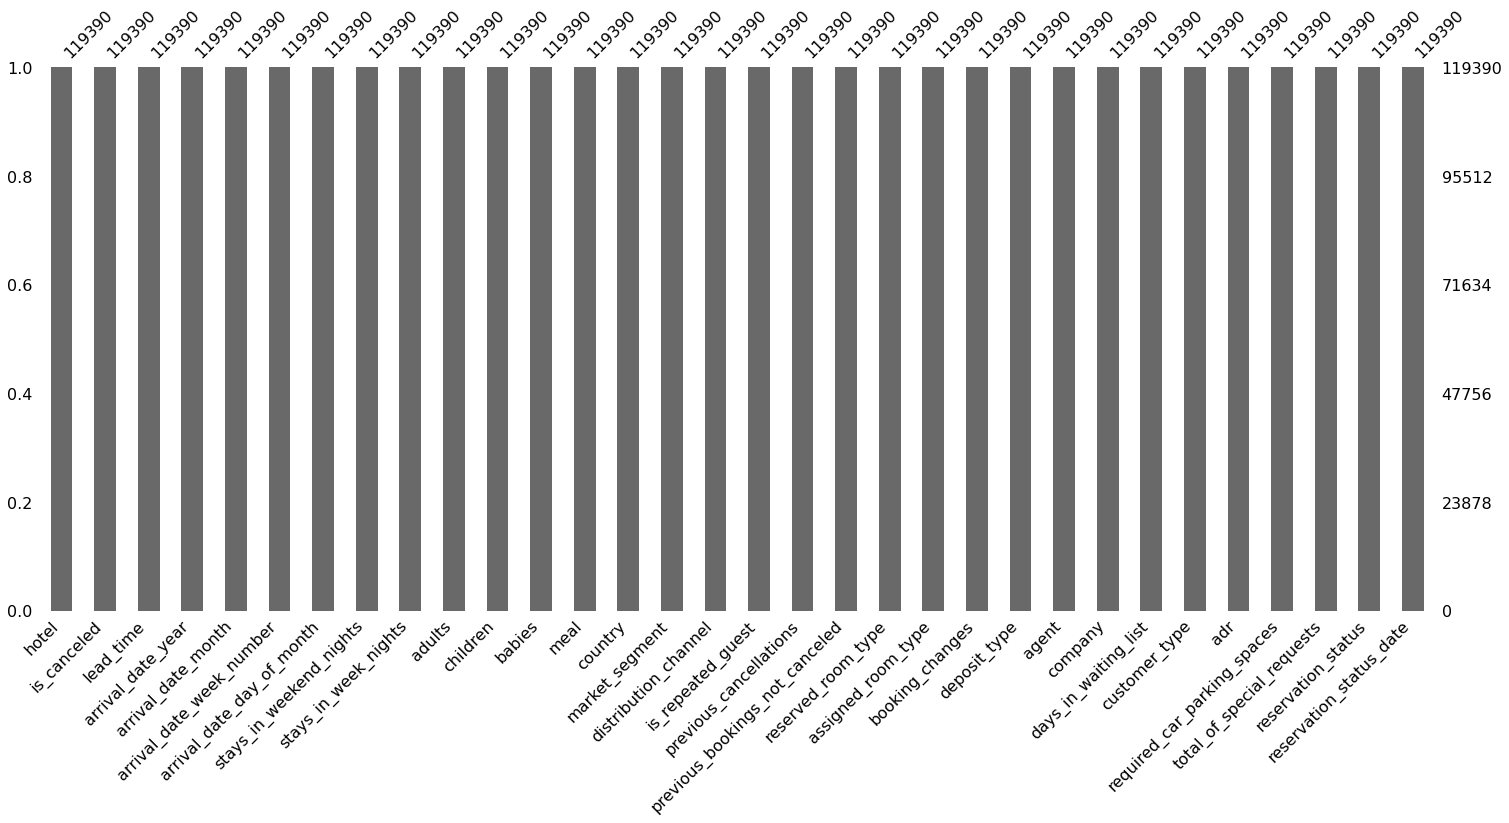

In [87]:
data = raw_data.fillna(0)
raw_data.isnull().sum()
msno.bar(data)